In [160]:
#Load the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.tree import plot_tree

In [161]:
#Load the data
obesity = pd.read_csv('ObesityDataSet.csv')
obesity.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [162]:
#Separate the independent and dependent variables
#obesity_x = obesity[['Weight', 'Height', 'Gender', 'Age', 'FAVC', 'FCVC']] #use code if top 5 variables in feature importance are used
#obesity_x = obesity.drop(columns=['CALC', 'MTRANS', 'SCC', 'NObesity']) #use code if bottom 3 variables in feature importance are dropped
obesity_x = obesity.drop('NObesity', axis=1)
obesity_y = obesity['NObesity']

In [163]:
#Address categorical data features with one hot encoding
obesity_x_encoded = pd.get_dummies(obesity_x, drop_first= True)
obesity_x_encoded.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,family_history_with_overweight_yes,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,0,1,...,0,0,0,0,0,1,0,0,1,0
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,0,1,...,0,1,1,0,1,0,0,0,1,0
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,1,1,...,0,0,0,1,0,0,0,0,1,0
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [164]:
#Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(obesity_x_encoded, obesity_y, test_size=0.3)

In [165]:
#Train the model with the decision tree classifier
dtree_gini = DecisionTreeClassifier(criterion = 'gini',
random_state = 43, max_depth=3, min_samples_leaf=5)
dtree_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=43)

In [166]:
#Predict the test dataset values using the model above
y_pred_en = dtree_gini.predict(x_test)
y_pred_en

array(['Obesity_Type_I', 'Obesity_Type_I', 'Obesity_Type_III',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_I', 'Obesity_Type_I', 'Insufficient_Weight',
       'Obesity_Type_II', 'Obesity_Type_I', 'Normal_Weight',
       'Obesity_Type_I', 'Obesity_Type_III', 'Obesity_Type_I',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_I',
       'Obesity_Type_I', 'Obesity_Type_I', 'Overweight_Level_I',
       'Overweight_Level_I', 'Overweight_Level_I', 'Normal_Weight',
       'Obesity_Type_II', 'Overweight_Level_I', 'Normal_Weight',
       'Insufficient_Weight', 'Obesity_Type_II', 'Normal_Weight',
       'Insufficient_Weight', 'Insufficient_Weight', 'Obesity_Type_I',
       'Obesity_Type_II', 'Normal_Weight', 'Obesity_Type_III',
       'Obesity_Type_I', 'Overweight_Level_I', 'Obesity_Type_I',
       'Obesity_Type_I', 'Obesity_Type_I', 'Obesity_Type_I',
       'Obesity_Type_III', 'Insufficient_Weight', 'Obesity_Type_I',
       'Normal_Weight'

In [167]:
#Check the evaluation metrics of the model
accuracy = accuracy_score(y_test,y_pred_en)
precision = precision_score(y_test, y_pred_en, average='macro')
recall = recall_score(y_test, y_pred_en, average='macro')
print("Accuracy:", accuracy*100)
print("Precision:", precision*100)
print("Recall:", recall*100)

Accuracy: 63.56466876971609
Precision: 60.32132417540519
Recall: 62.194851395948305


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


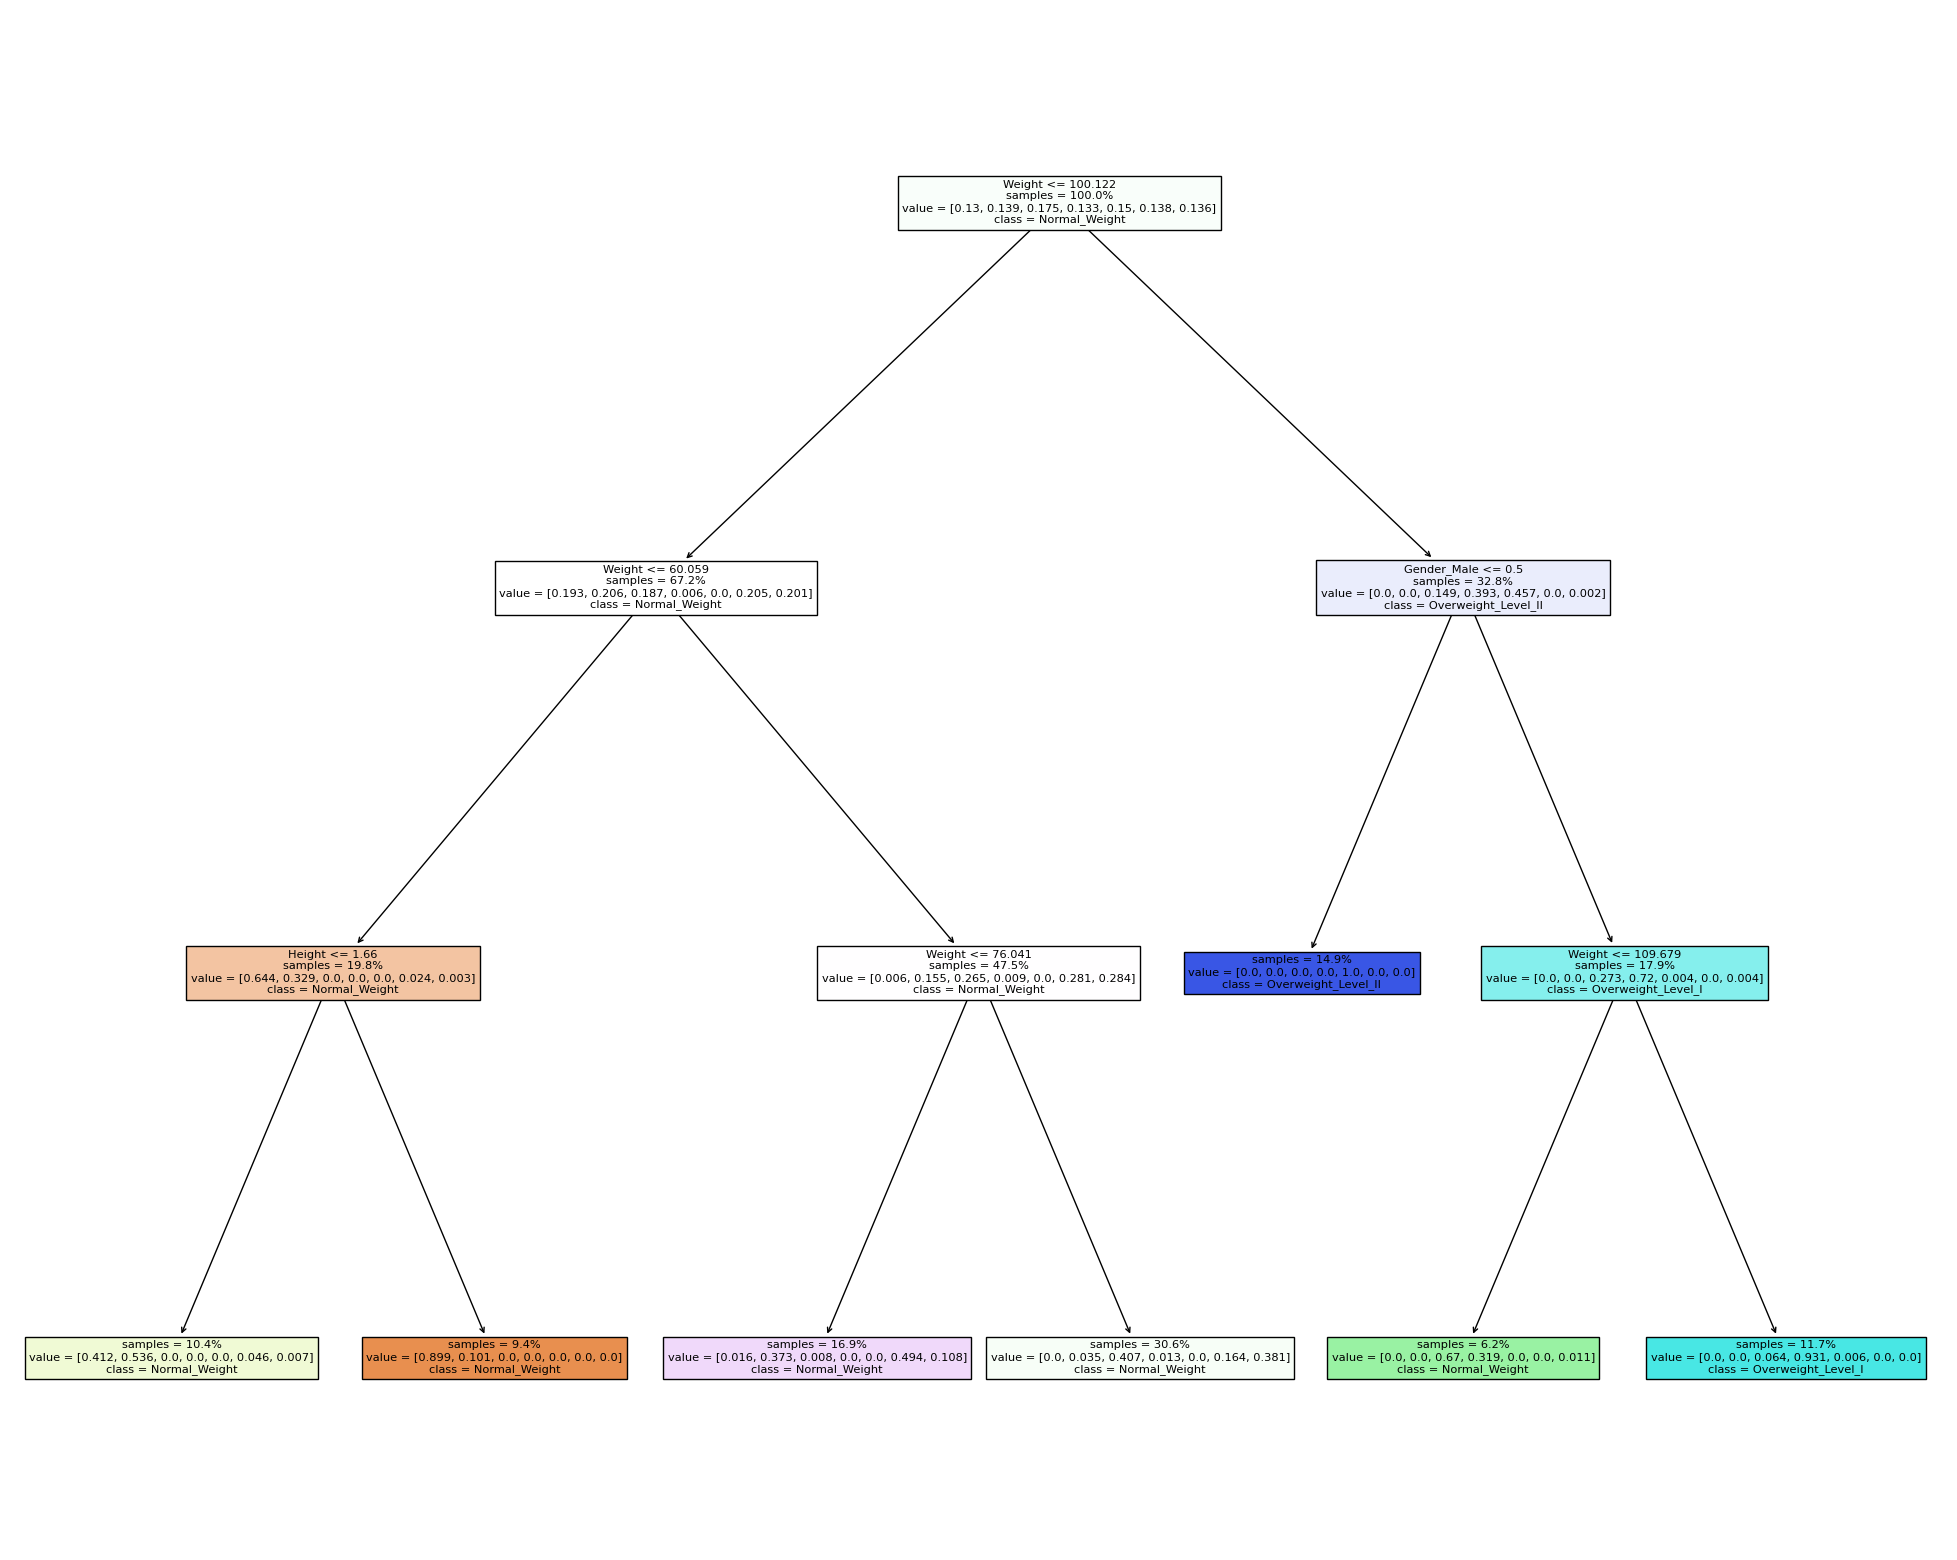

In [168]:
#Visualize the decision tree
fig = plt.figure(figsize=((25,20)))
plot_tree(dtree_gini,
            feature_names = obesity_x_encoded.columns,
            class_names=obesity_y,
            impurity=False,
            proportion=True,
            filled=True)
fig.savefig('test.png')

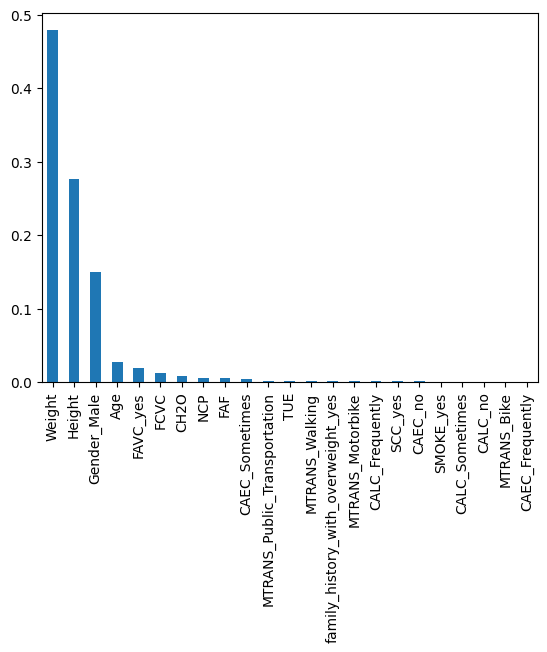

In [169]:
best_dt = DecisionTreeClassifier()
best_dt.fit(x_train, y_train)

# Get feature importances
feature_importances_dt = pd.Series(best_dt.feature_importances_, index=x_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances_dt.plot.bar();